# Sparse coding

This will also layout the groundwork for the Redundant Collective Perception Service (RCPS) that dials down the network transmission

## Load the trajectory data, as usual

In [4]:
import numpy as np
import pickle 
from matplotlib import pyplot as plt 
trajectory_file = open("trajectories.pyo", "rb")
trajs = pickle.load(trajectory_file)
y_vec = np.array(trajs['y_vec'])
t_vec = np.array(trajs['t_vec'])
del trajs
trajectory_file.close()
del trajectory_file

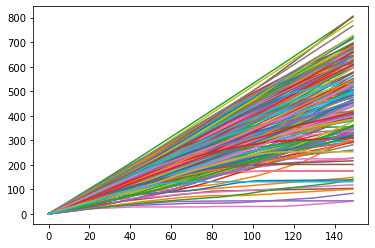

In [5]:
for traj in range(y_vec.shape[0]):
    plt.plot(y_vec[traj])

This is the sample trajectory dataset

## Dictionary learning

In [6]:
from sklearn.decomposition import DictionaryLearning
dicc = DictionaryLearning(n_components=100, alpha=1, max_iter=1000)
dicc_components = dicc.fit(y_vec).components_

Dictionary elements

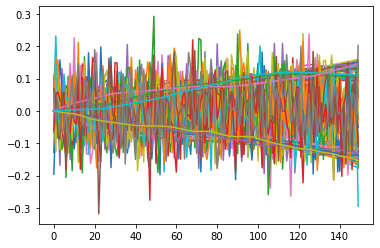

In [7]:
for i in range(dicc_components.shape[0]):
    plt.plot(dicc_components[i])

Time to test the coded sample trajectories

In [8]:
dicc.set_params(transform_algorithm='omp', transform_n_nonzero_coefs=1)
code = dicc.transform(y_vec[3].copy().reshape(-1,1).transpose())

Let's reconstruct

In [9]:
reconstruct = np.dot(code, dicc.components_)

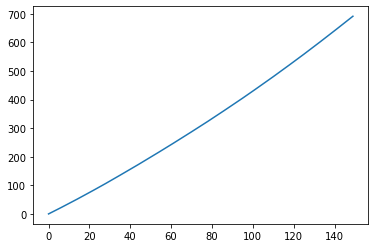

In [10]:
plt.plot(reconstruct.transpose())

In [11]:
synth1 = np.load('synth1.npz')['data']
synth2 = np.load('synth2.npz')['data']

In [12]:
dicc.set_params(transform_algorithm='omp', transform_n_nonzero_coefs=5)
code_s1 = dicc.transform(synth1.reshape(-1,1).transpose())
code_s1

array([[    0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
        -2082.54634232,     0.        ,     0.        ,     0.        ,
         7081.09386217,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,   -32.31418797,     0.  

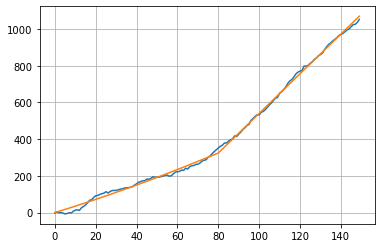

In [13]:
reconstruct_s1 = np.dot(code_s1, dicc.components_).transpose()
plt.plot(reconstruct_s1)
plt.plot(synth1.reshape((-1,1)))
plt.grid(True)

(array([ 4., 10., 11., 22., 20., 25., 24., 17., 12.,  5.]),
 array([-30.79631731, -24.99345943, -19.19060154, -13.38774365,
         -7.58488577,  -1.78202788,   4.02083   ,   9.82368789,
         15.62654577,  21.42940366,  27.23226154]),
 <BarContainer object of 10 artists>)

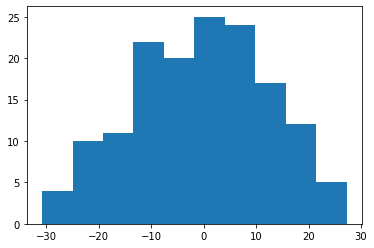

In [14]:
plt.hist(reconstruct_s1 - synth1.reshape((-1,1)))